# Model-A (2. Lasso)

### Import the necessary libraries to run the calculations below.

In [1]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import numpy as np
np.random.seed(42)

from sklearn.linear_model import Lasso, LassoCV, Ridge, RidgeCV

%matplotlib inline

### Import the data and scaling model.

In [2]:
train = pd.read_csv("../data/train_dum.csv", index_col='Id')
kaggle = pd.read_csv("../data/test_dum.csv", index_col='Id')         # To be used for Submission #

In [3]:
X_train = pd.read_csv('../data/X_train_dum_sc.csv', header=None)
X_test = pd.read_csv('../data/X_test_dum_sc.csv', header=None)
y_train = pd.read_csv('../data/y_train.csv', header=None)
y_test = pd.read_csv('../data/y_test.csv', header=None)

In [4]:
with open('../data/scaler.pkl', 'rb') as f:
    sc = pickle.load(f)

In [5]:
X_train.head()           # Here, the applied scaling can be verified.

,0,1,2,3,4,5,6,7,8,9,...,314,315,316,317,318,319,320,321,322,323
0,1.839635,0.531987,0.628240,2.165189,-1.124198,-0.198475,-0.555218,-0.347634,-0.291180,0.338949,...,-0.190885,-0.187191,-0.067662,-0.036108,-0.092389,-0.025524,-0.057148,-0.288471,-0.051098,0.389133
1,-0.439985,-0.519838,-0.765227,2.165189,-0.696674,0.851277,-0.555218,-0.098234,0.584287,-0.557978,...,-0.190885,-0.187191,-0.067662,-0.036108,-0.092389,-0.025524,-0.057148,-0.288471,-0.051098,0.389133
2,0.772579,0.119061,1.324973,-0.509661,1.046307,0.946709,1.190625,1.547809,2.523241,2.325644,...,-0.190885,-0.187191,-0.067662,-0.036108,-0.092389,-0.025524,-0.057148,-0.288471,-0.051098,0.389133
3,-0.000785,0.354649,1.324973,1.273573,0.783215,0.517265,2.193304,-1.000610,-0.291180,1.516167,...,-0.190885,-0.187191,-0.067662,-0.036108,-0.092389,-0.025524,-0.057148,-0.288471,-0.051098,0.389133
4,-0.439985,-0.020554,-0.068494,1.273573,-1.025539,-1.629955,-0.555218,-1.000610,-0.291180,0.475731,...,-0.190885,-0.187191,-0.067662,-0.036108,-0.092389,-0.025524,-0.057148,-0.288471,-0.051098,0.389133


In [6]:
np.mean(y_train)     # The model mean is calculated here.

0    181486.201823
dtype: float64

### This confirms our baseline model, the mean of \$ 181,486.20.

In [7]:
lm = LassoCV()

In [8]:
lm.fit(X_train, y_train)

/Users/perry/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:1094: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LassoCV(alphas=None, copy_X=True, cv=None, eps=0.001, fit_intercept=True,
    max_iter=1000, n_alphas=100, n_jobs=1, normalize=False, positive=False,
    precompute='auto', random_state=None, selection='cyclic', tol=0.0001,
    verbose=False)

In [9]:
lm.score(X_train, y_train)

0.9369588826063185

In [10]:
lm.score(X_test, y_test)

0.9334452224099693

### The model picked the best alpha hyperparameter to be about 447.

In [11]:
lm.alpha_

447.4109227447246

In [12]:
with open('../data/columns.pkl', 'rb') as f:
    columns = pickle.load(f)

### Load the saved column headers and calculate the beta-coefficients for each feature.

In [13]:
betas = pd.DataFrame(lm.coef_, index=columns)

In [14]:
betas.head()

,0
LotFrontage,966.236723
LotArea,4085.362189
OverallQual,10078.355467
OverallCond,5012.733199
YearBuilt,7749.189309


In [15]:
betas.columns = ['weights']

In [16]:
betas['abs_w'] = betas.weights.abs()

### The beta-0 price-intercept is calculated here.

In [17]:
beta_0 = lm.intercept_

In [18]:
weights = betas.sort_values('abs_w', ascending=False)['weights'].head(20)

In [19]:
labels = weights.index

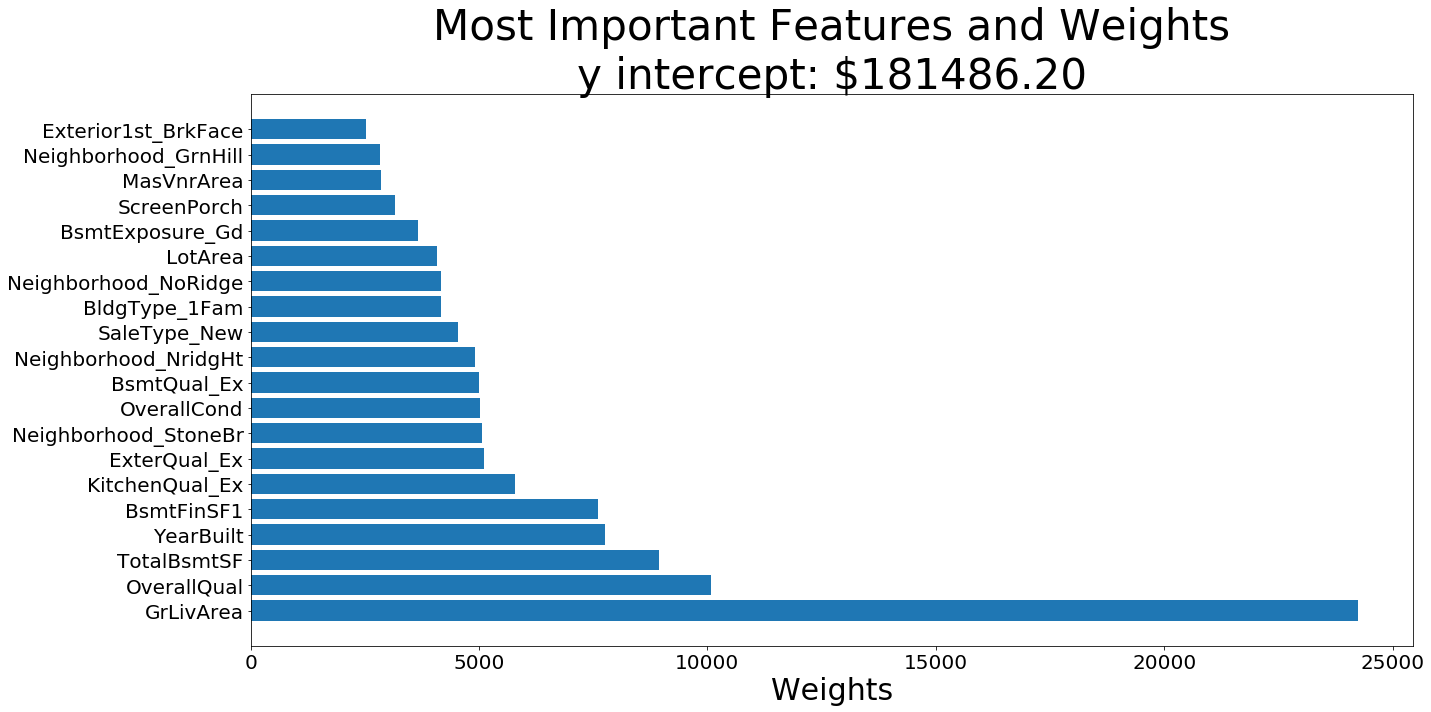

In [20]:
plt.figure(figsize=(20,10))
plt.barh(labels, weights)
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
plt.xlabel('Weights', fontsize=30)
plt.title(f'Most Important Features and Weights\ny intercept: ${beta_0:0.02f}', fontsize=42)
plt.tight_layout()

# Chart of Coefficients for the best feature predictors; Ground-Living-Area has by far the most important feature pridicting home price.

In [21]:
removed_feats = list(betas[betas['weights'] == 0].index)

### 183 features dropped by the Lasso-regularization process.

In [22]:
for feat in removed_feats:
    print(feat)

BsmtUnfSF
1stFlrSF
2ndFlrSF
BsmtHalfBath
OpenPorchSF
EnclosedPorch
3SsnPorch
PoolArea
MiscVal
YrSold
MSSubClass_20
MSSubClass_40
MSSubClass_50
MSSubClass_60
MSSubClass_70
MSSubClass_80
MSSubClass_85
MSSubClass_90
MSSubClass_150
MSSubClass_160
MSSubClass_180
MSSubClass_190
MSZoning_A (agr)
MSZoning_I (all)
MSZoning_RH
MSZoning_RL
Alley_Grvl
Alley_None
Alley_Pave
LotShape_IR1
LotShape_Reg
LandContour_Low
LandContour_Lvl
LotConfig_Corner
LotConfig_Inside
LandSlope_Gtl
LandSlope_Mod
LandSlope_Sev
Neighborhood_Blmngtn
Neighborhood_Blueste
Neighborhood_BrDale
Neighborhood_ClearCr
Neighborhood_CollgCr
Neighborhood_Greens
Neighborhood_IDOTRR
Neighborhood_Landmrk
Neighborhood_MeadowV
Neighborhood_Mitchel
Neighborhood_SWISU
Neighborhood_Sawyer
Neighborhood_SawyerW
Neighborhood_Timber
Condition1_Feedr
Condition1_PosA
Condition1_RRAn
Condition1_RRNe
Condition2_Feedr
Condition2_Norm
Condition2_RRAe
Condition2_RRAn
Condition2_RRNn
BldgType_2fmCon
BldgType_Duplex
BldgType_Twnhs
HouseStyle_1.5Fin
Hous

In [23]:
with open('../data/lasso.pkl', 'wb+') as f:
    pickle.dump(lm, f)

# Model-B (3. Ridge)

### This is the last of the three required models.

In [24]:
from sklearn.linear_model import Ridge

In [25]:
lm2 = RidgeCV()

In [26]:
def ridge_coefs(X, Y, alphas):
    
    # set up the list to hold the different sets of coefficients:
    coefs = []
    
    # Set up a ridge regression object
    ridge_reg = Ridge()
    
    # Iterate through the alphas fed into the function:
    for a in alphas:
        
        # On each alpha reset the ridge model's alpha to the current one:
        ridge_reg.set_params(alpha = a)
        
        # fit or refit the model on the provided X, Y
        ridge_reg.fit(X,Y)
        
        # Get out the coefficient list
        coefs.append(ridge_reg.coef_)
        
    return coefs

In [27]:
# np.logspace gives us points between specified orders of magnitude on a logarithmic scale. It is base 10.
r_alphas = np.logspace(0,5,200)

# Get the coefficients for each alpha for the Ridge, using the function above
r_coefs = ridge_coefs(X_train, y_train, r_alphas)

In [28]:
lm2.fit(X_train, y_train)

RidgeCV(alphas=(0.1, 1.0, 10.0), cv=None, fit_intercept=True, gcv_mode=None,
    normalize=False, scoring=None, store_cv_values=False)

In [29]:
lm2.score(X_train,y_train)

0.9440717576480293

In [30]:
lm2.score(X_test, y_test)

0.9304830681808789

## The similarity between the the train- and test-scores (within 2%) reflects a model that appears to generalize well and to make good price predictions.

In [31]:
lm2.coef_.shape

(1, 324)

In [32]:
len(columns)

324

In [33]:
betas_R = pd.DataFrame(lm2.coef_, columns=columns).T

In [34]:
betas_R.head()

,0
LotFrontage,2299.558432
LotArea,4727.630646
OverallQual,8309.728573
OverallCond,6420.780915
YearBuilt,11739.032510


In [35]:
betas_R.columns = ['weights']
len(list(betas[betas['weights'] == 0].index))

183

## Here we calculate the beta-0 (intercept) and the feature coefficients.

In [36]:
betaR_0 = lm.intercept_

In [37]:
weights_R = betas_R.sort_values('weights', ascending=False).head(20)
weights_R.head()

,weights
GrLivArea,14294.207110
YearBuilt,11739.032510
2ndFlrSF,10411.628004
TotalBsmtSF,10140.822486
BsmtFinSF1,8982.256213


In [38]:
labels_R = weights_R.index

In [39]:
weights_R.weights.values

array([14294.20711035, 11739.03250978, 10411.62800424, 10140.82248598,
        8982.2562135 ,  8309.72857274,  6724.87544964,  6420.78091482,
        5147.06307145,  4974.32471599,  4908.78571674,  4727.63064559,
        4702.11185241,  4457.37864007,  3839.26248556,  3675.2373056 ,
        3565.94516116,  3404.83752133,  3269.20685438,  3227.00848452])

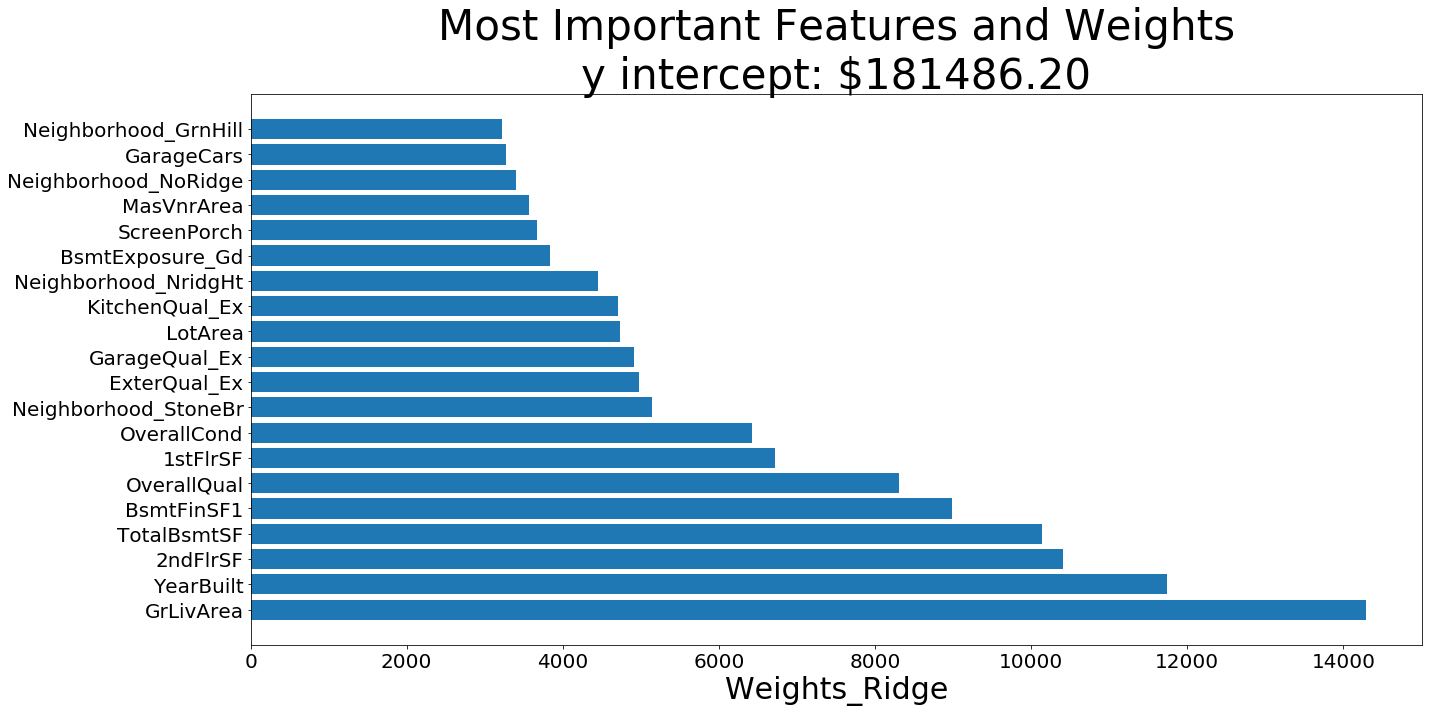

In [40]:
plt.figure(figsize=(20,10))
plt.barh(labels_R, weights_R.weights.values)
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
plt.xlabel('Weights_Ridge', fontsize=30)
plt.title(f'Most Important Features and Weights\ny intercept: ${beta_0:0.02f}', fontsize=42)
plt.tight_layout()

### Tentative submission based on a slightly better regression-score for this Ridge model.  Kaggle evaluated the Lasso model above as superior.

In [41]:
kag_index_R = kaggle.index

In [42]:
kaggle_R = sc.transform(kaggle)

In [43]:
predictors_R = lm2.predict(kaggle_R)

In [44]:
submission_R = pd.DataFrame(predictors_R, index=kag_index_R, columns=['SalePrice'])

In [45]:
submission_R.sort_index(inplace=True)

In [46]:
submission_R.head()

,SalePrice
Id,
2,131839.579111
4,282139.580758
6,194299.730526
7,217996.589558
17,218127.680055


In [47]:
submission_R.to_csv('../data/submission_rcv.csv')

# Discussion

In [48]:
def md_coef_table(labels, weights):
    print('| feature | weight |\n| --- | --- |')
    for i in range(len(labels)):
        print(f'| {labels[i]} | {weights[i]} |')

In [49]:
md_coef_table(labels[:5], weights_R['weights'][:5])

| feature | weight |
| --- | --- |
| GrLivArea | 14294.207110352603 |
| OverallQual | 11739.032509777811 |
| TotalBsmtSF | 10411.628004244918 |
| YearBuilt | 10140.822485979115 |
| BsmtFinSF1 | 8982.256213496963 |


| feature | Lasso-Coefficients |
| --- | --- |
| GrLivArea | 14847.277369476242 |
| OverallQual | 13173.366705095634 |
| TotalBsmtSF | 11194.454666543885 |
| YearBuilt | 10443.239232155505 |
| BsmtFinSF1 | 9208.239831709307 |

### For Lasso regularization, 'OverallQual' was captured as a major predictor.  

In [50]:
md_coef_table(labels_R[:5], weights_R['weights'][:5])

| feature | weight |
| --- | --- |
| GrLivArea | 14294.207110352603 |
| YearBuilt | 11739.032509777811 |
| 2ndFlrSF | 10411.628004244918 |
| TotalBsmtSF | 10140.822485979115 |
| BsmtFinSF1 | 8982.256213496963 |


| feature | Ridge-Coefficients |
| --- | --- |
| GrLivArea | 14847.277369476242 |
| YearBuilt | 13173.366705095634 |
| 2ndFlrSF | 11194.454666543885 |
| TotalBsmtSF | 10443.239232155505 |
| BsmtFinSF1 | 9208.239831709307 |

### For Ridge regularization, '2ndFlrSF' was captured as a major predictor.  '2ndFlrSF' was not among the top-20 Lasso predictors.

# Save these models.

In [51]:
with open('../data/ridge.pkl', 'wb+') as f:
    pickle.dump(lm2, f)

# Please continue to Notebook-4.